1. Агрегация по визитам
 
 Создай функцию aggregate_client_daily_items(df), которая:
 1. Группирует транзакции по (client, tr_date, item, item_group)
 2. Суммирует quantity и amount для каждой группы（Только когда четыре столбца данных этой строки — client, tr_date, item, item_group — совпадают, их количество и сумма будут суммированы и объединены в одну строку (для удовлетворяющих условию строк суммируются quantity и amount, чтобы получить данные, объединенные в одну строку).）
 3. Возвращает DataFrame с колонками: client, visit_date, item, item_group, quantity, amount
 4. Отсортирован по client, visit_date, item
 Комментарий: bcode (номер чека) игнорируем — нас интересует, что клиент купил в день, а не структура чеков.
 5.Вывести общее количество данных.


 

In [3]:
import pandas as pd

def aggregate_client_daily_items(df):
    """
    Агрегирует транзакции в визиты по клиенту и дню.
    
    Группировка: по (client, tr_date, item, item_group)
    - Суммирует quantity и amount для совпадающих строк
    - Возвращает: client, visit_date, item, item_group, quantity, amount
    - Сортировка: client, visit_date, item
    """
    
    # --- 1. Проверка размера исходных данных ---
    print(f"📊 ИСХОДНЫЕ ДАННЫЕ: {len(df)} строк")
    
    # --- 2. Проверка колонок ---
    required_cols = ['client', 'tr_date', 'item', 'quantity', 'amount']
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        raise KeyError(f"❌ Отсутствуют колонки: {missing}")
    
    # --- 3. Работа с копией данных ---
    df = df.copy()
    
    # Обработка отсутствующей колонки item_group
    if 'item_group' not in df.columns:
        print("🔧 Колонка 'item_group' отсутствует. Создаём заглушку: 'Unknown'")
        df['item_group'] = 'Unknown'
    
    # --- 4. Преобразование даты ---
    print("🔍 Анализ формата tr_date...")
    
    # Попытка конвертации в datetime
    # 'coerce' превратит нераспознанные даты в NaT (пустое значение)
    # dayfirst=True полезно для форматов типа DD.MM.YYYY
    df['temp_date'] = pd.to_datetime(df['tr_date'], errors='coerce', dayfirst=True)
    
    # Проверка на невалидные даты
    invalid_count = df['temp_date'].isna().sum()
    print(f"📊 Успешно распознано дат: {len(df) - invalid_count}")
    
    if invalid_count > 0:
        print(f"✂️ Удаляем {invalid_count} строк с некорректной датой")
        df = df.dropna(subset=['temp_date'])
        
    # Извлекаем только дату (YYYY-MM-DD) для корректной группировки
    df['visit_date'] = df['temp_date'].dt.date
    
    # --- 5. Очистка пустых значений ---
    before_group = len(df)
    df = df.dropna(subset=['client', 'item', 'visit_date']).copy()
    after_group = len(df)
    if before_group != after_group:
        print(f"✂️ Удалено строк с пустыми client/item/датой: {before_group - after_group}")
    
    # --- 6. Группировка ---
    # Логика: объединяем строки, только если client, visit_date, item И item_group совпадают
    print("🔄 Выполняем группировку по (client, visit_date, item, item_group)...")
    
    aggregated = (
        df.groupby(['client', 'visit_date', 'item', 'item_group'], as_index=False)
        .agg({
            'quantity': 'sum',
            'amount': 'sum'
        })
        .round(2)
    )
    
    print(f"✅ Агрегировано: {len(aggregated)} строк (после объединения)")
    
    # --- 7. Сортировка ---
    result = aggregated.sort_values(['client', 'visit_date', 'item']).reset_index(drop=True)
    
    # --- 8. Финальный результат ---
    print(f"\n🎯 ФИНАЛЬНЫЙ РЕЗУЛЬТАТ: {len(result)} строк")
    
    return result[['client', 'visit_date', 'item', 'item_group', 'quantity', 'amount']]

# ==========================================
# БЛОК ВЫПОЛНЕНИЯ (То, чего не хватало)
# ==========================================

# 1. Загрузка данных
try:
    print("📂 Загрузка файла...")
    # Убедитесь, что файл находится в той же папке
    df_source = pd.read_csv('transactions_diy.csv') 
    
    # 2. Вызов функции и сохранение результата в переменную
    df_daily_items = aggregate_client_daily_items(df_source)

    # 3. Вывод результатов
    print("-" * 30)
    print(f"✅ Переменная с результатом создана: {len(df_daily_items)} строк")
    print(df_daily_items.head(10))
    
except FileNotFoundError:
    print("❌ Ошибка: Файл 'transactions_diy.csv' не найден. Пожалуйста, загрузите его.")
except Exception as e:
    print(f"❌ Произошла ошибка: {e}")

📂 Загрузка файла...
📊 ИСХОДНЫЕ ДАННЫЕ: 1008688 строк
🔍 Анализ формата tr_date...
📊 Успешно распознано дат: 1008688
🔄 Выполняем группировку по (client, visit_date, item, item_group)...
✅ Агрегировано: 1003083 строк (после объединения)

🎯 ФИНАЛЬНЫЙ РЕЗУЛЬТАТ: 1003083 строк
------------------------------
✅ Переменная с результатом создана: 1003083 строк
      client  visit_date      item                    item_group  quantity  \
0    client1  2018-01-22  sku10765                 Лаки и краски         1   
1    client1  2018-01-22  sku13695                 Стойматериалы         5   
2    client1  2018-01-22  sku29083                 Лаки и краски         2   
3    client1  2018-01-22   sku2954                 Лаки и краски         1   
4   client10  2019-08-05   sku1893                   Инструменты         1   
5   client10  2019-08-05   sku5624                   Инструменты         1   
6   client10  2019-08-05   sku7053                   Инструменты         1   
7  client100  2019-05-0

2. Расчет профиля клиента (период наблюдения)
 
 Задача: на дату актуальности (конец периода наблюдения) рассчитать для каждого клиента его профиль с 
RFM и дополнительными признаками.
 ПРОМПТА
 Напиши функцию calculate_client_profile_at_date(visits_df, 
observation_end_date).
 Функция должна:
 1. Фильтровать визиты СТРОГО ДО observation_end_date
 (visit_date < observation_end_date)
 Это важно для метода аналогий — нет утечки данных!
 2. Для каждого клиента рассчитать RFM признаки:- Recency: количество дней между последним визитом и 
observation_end_date- Frequency: количество УНИКАЛЬНЫХ ДАТ визитов (не товаров!)- Monetary: общая сумма всех покупок
 3. Дополнительные признаки:- last_visit_date: дата последнего визита- total_quantity: общее количество товаров- avg_check: средний чек (Monetary / Frequency)- total_unique_items: количество уникальных товаров за 
историю- avg_items_per_visit: среднее количество товаров на визит- weekend_visits: количество визитов в субботу и воскресенье- amount_last_visit: сумма последнего визита
 4. Вернуть DataFrame с профилями, отсортированный по client.
 Ожидаемый результат
 ▪ Для observation_end_date = '2019
09-01': ~893k клиентов
 ▪ Это профили клиентов на 1 
сентября 2019 (с историей покупок 
до этой даты невключительно)


In [6]:
import pandas as pd
import numpy as np

def calculate_client_profile_at_date(visits_df, observation_end_date):
    """
    Рассчитывает RFM-профиль клиентов на определенную дату с добавлением
    признаков tenure и avg_visit_interval.
    """
    # 1. Подготовка
    obs_date = pd.to_datetime(observation_end_date)
    df = visits_df.copy()
    
    if not pd.api.types.is_datetime64_any_dtype(df['visit_date']):
        df['visit_date'] = pd.to_datetime(df['visit_date'])
    
    # 2. Фильтрация: строго ДО даты наблюдения
    df_filtered = df[df['visit_date'] < obs_date].copy()
    
    print(f"🧐 Данные до {observation_end_date}: {len(df_filtered)} строк (было {len(df)})")

    if df_filtered.empty:
        print("⚠️ Нет данных за указанный период.")
        return pd.DataFrame()
    
    # 3. Предварительные вычисления
    df_filtered['is_weekend'] = df_filtered['visit_date'].dt.weekday.isin([5, 6]).astype(int)
    
    # 4. Основная агрегация (GROUPBY)
    # Добавляем 'min' для visit_date, чтобы получить дату первого визита
    profiles = df_filtered.groupby('client').agg(
        first_visit_date=('visit_date', 'min'), # <--- НУЖНО ДЛЯ НОВЫХ ФИЧЕЙ
        last_visit_date=('visit_date', 'max'),
        Frequency=('visit_date', 'nunique'),
        Monetary=('amount', 'sum'),
        total_quantity=('quantity', 'sum'),
        total_unique_items=('item', 'nunique'),
        weekend_visits=('is_weekend', 'sum')
    )
    
    # 5. Расчет amount_last_visit (без изменений)
    last_visits = profiles[['last_visit_date']].reset_index()
    last_visit_transactions = df_filtered.merge(
        last_visits, 
        left_on=['client', 'visit_date'], 
        right_on=['client', 'last_visit_date']
    )
    last_visit_amounts = last_visit_transactions.groupby('client')['amount'].sum().rename('amount_last_visit')
    profiles = profiles.join(last_visit_amounts)
    
    # 6. Производные метрики
    
    # (a) Старые метрики
    profiles['Recency'] = (obs_date - profiles['last_visit_date']).dt.days
    profiles['avg_check'] = (profiles['Monetary'] / profiles['Frequency']).round(2)
    profiles['avg_items_per_visit'] = (profiles['total_quantity'] / profiles['Frequency']).round(2)
    
    # (b) НОВЫЕ МЕТРИКИ
    # Tenure: сколько дней клиент с нами (от первого визита до даты наблюдения)
    profiles['tenure'] = (obs_date - profiles['first_visit_date']).dt.days
    
    # Avg Visit Interval: средний интервал между покупками
    # Формула: (Последняя дата - Первая дата) / (Кол-во визитов - 1)
    # Если визит 1, то деление на 0 даст inf или ошибку, поэтому используем np.where
    visit_span_days = (profiles['last_visit_date'] - profiles['first_visit_date']).dt.days
    
    profiles['avg_visit_interval'] = np.where(
        profiles['Frequency'] > 1,
        visit_span_days / (profiles['Frequency'] - 1),
        np.nan
    ).round(1)

    # Преобразуем дату в формат date для красивого вывода
    profiles['last_visit_date'] = profiles['last_visit_date'].dt.date
    
    # 7. Финиш
    profiles = profiles.reset_index().sort_values('client')
    
    cols = ['client', 'Recency', 'Frequency', 'Monetary', 
            'last_visit_date', 'total_quantity', 'avg_check', 
            'total_unique_items', 'avg_items_per_visit', 
            'weekend_visits', 'amount_last_visit',
            'tenure', 'avg_visit_interval'] # <--- Добавили новые колонки в вывод
    
    return profiles[cols]

# --- ЗАПУСК ---
observation_end_date = '2019-09-01'
client_profiles = calculate_client_profile_at_date(df_daily_items, observation_end_date)

print(f"✅ Итого клиентов: {len(client_profiles)}")
print(client_profiles[['client', 'Recency', 'Frequency', 'tenure', 'avg_visit_interval']].head())

🧐 Данные до 2019-09-01: 892864 строк (было 1003083)
✅ Итого клиентов: 39906
        client  Recency  Frequency  tenure  avg_visit_interval
0      client1      587          1     587                 NaN
1     client10       27          1      27                 NaN
2    client100      116          1     116                 NaN
3   client1000        8         12     354                31.5
4  client10000      396          1     396                 NaN


3. Разметка события (период результата)

Задача: определить, посещал ли клиент магазин в заданный период [result_start, result_end).
 ПРОМПТА
 Напиши функцию mark_events(visits_df, 
result_start_date, result_end_date).
 Функция должна:
 1. Получить уникальный список всех client из 
visits_df
 2. Фильтровать визиты в СТРОГОМ диапазоне:
 visit_date >= result_start_date И visit_date < 
result_end_date
 3. Определить, какие клиенты имели хотя бы один 
визит в этот период
 4. Вернуть DataFrame с двумя колонками:- client: все уникальные клиенты- event: True если клиент посетил магазин в 
период, иначе False
 Важно: это ТОЛЬКО разметка события, без признаков!
 Ожидаемый результат
 ▪ Для period [2019-09-01, 2019-10-01): 
~7.5k клиентов (18% вернулись)
 ▪ Это целевая переменная для 
обучения (событие)


In [5]:
import pandas as pd

def mark_events(visits_df, result_start_date, result_end_date):
    """
    Размечает целевое событие (отток/возвращение) для клиентов.
    
    1. Берет список ВСЕХ клиентов из истории.
    2. Проверяет, были ли у них визиты в период [result_start_date, result_end_date).
    3. Возвращает таблицу: client, event (1/0 или True/False).
    """
    # --- 1. Подготовка дат ---
    start_date = pd.to_datetime(result_start_date)
    end_date = pd.to_datetime(result_end_date)
    
    # Работаем с копией, чтобы не менять исходник
    df = visits_df.copy()
    
    # Убедимся, что visit_date - это datetime
    if not pd.api.types.is_datetime64_any_dtype(df['visit_date']):
        df['visit_date'] = pd.to_datetime(df['visit_date'])

    # --- 2. Получение полного списка клиентов ---
    # Нам нужно вернуть ВСЕХ уникальных клиентов, которые есть в базе,
    # даже если они не приходили в целевой период.
    all_clients = pd.DataFrame(df['client'].unique(), columns=['client'])
    
    # --- 3. Фильтрация визитов в целевом периоде ---
    # Условие: result_start <= дата < result_end
    mask_period = (df['visit_date'] >= start_date) & (df['visit_date'] < end_date)
    visits_in_period = df[mask_period]
    
    # Получаем список клиентов, которые были активны в этот период
    active_clients_set = set(visits_in_period['client'].unique())
    
    # --- 4. Разметка событий (Векторизованно) ---
    # isin() работает очень быстро. Результат сразу булевый (True/False).
    # .astype(int) превратит True в 1, False в 0 (удобнее для ML).
    all_clients['event'] = all_clients['client'].isin(active_clients_set).astype(int)
    
    # Сортировка для красоты
    result = all_clients.sort_values('client').reset_index(drop=True)
    
    # --- Логи для проверки ---
    total_clients = len(result)
    active_count = result['event'].sum()
    conversion_rate = (active_count / total_clients) * 100 if total_clients > 0 else 0
    
    print(f"🎯 Период разметки: [{start_date.date()} -> {end_date.date()})")
    print(f"📊 Всего клиентов в базе: {total_clients}")
    print(f"✅ Клиентов с визитами (event=1): {active_count} ({conversion_rate:.1f}%)")
    
    return result

# ==================================================
# ТЕСТ ЗАПУСКА (Используем df_daily_items с шага 1)
# ==================================================

result_start = '2019-09-01'
result_end = '2019-10-01'

print("\n🚀 Запуск разметки событий...")
df_events = mark_events(df_daily_items, result_start, result_end)

print("\n📋 Первые 5 строк результата:")
print(df_events.head())


🚀 Запуск разметки событий...
🎯 Период разметки: [2019-09-01 -> 2019-10-01)
📊 Всего клиентов в базе: 42746
✅ Клиентов с визитами (event=1): 8821 (20.6%)

📋 Первые 5 строк результата:
        client  event
0      client1      0
1     client10      0
2    client100      0
3   client1000      1
4  client10000      0


4. Объединение профиля и события в выборку

Задача: соединить профили клиентов с разметкой события в единую выборку.
ПРОМПТА
 Напиши функцию create_training_sample(profile_df, 
events_df).
 Функция должна:
 1. Выполнить inner join профиля и событий по 
'client’ (оставляем только клиентов, которые 
есть в обоих датафреймах)
 2. Проверить, что целевая переменная 'event' не 
содержит пропусков
 3. Удалить служебные колонки с датами (они не 
нужны для моделирования)
 4. Убедиться что в выборке есть оба класса для 
события (True и False)
 5. Вернуть готовую выборку
 На выходе: DataFrame где каждая строка = (профиль 
клиента + событие).
Ожидаемый результат
 ▪ Размер обучающей выборки: 39906 записей
 ▪ Распределение классов:
 •  False: 32375 (81.2%)
 • True:  7531 (18.8%)
 ▪ Признаки: ['client', 'Recency', 'Frequency', 
'Monetary', 'total_quantity', 'avg_check', 
'total_unique_items', 'avg_items_per_visit', 
'weekend_visits', 'amount_last_visit', 'event'，'tenure', 'avg_visit_interval']

In [8]:
import pandas as pd

def create_training_sample(profile_df, events_df):
    """
    Объединяет профиль клиента и информацию о целевом событии в единую выборку.
    (Соединяем X и y)
    """
    # 1. INNER JOIN: Объединяем профили и метки событий
    # Оставляем только тех клиентов, которые есть и в profiles (история), и в events (разметка)
    data = pd.merge(profile_df, events_df, on='client', how='inner')
    
    # 2. Проверка на пропуски в целевой переменной 'event'
    if data['event'].isnull().any():
        n_missing = data['event'].isnull().sum()
        print(f"⚠️ Внимание: найдено {n_missing} пропусков в поле 'event'. Строки удаляются.")
        data = data.dropna(subset=['event'])
        
    # 3. Удаление технических колонок с датами
    # Модели машинного обучения не работают с datetime напрямую, 
    # а вся информация из дат уже извлечена в фичи (Recency, tenure, avg_visit_interval)
    cols_to_drop = ['last_visit_date', 'first_visit_date']
    # Удаляем только те колонки, которые существуют в датафрейме
    existing_cols_to_drop = [c for c in cols_to_drop if c in data.columns]
    if existing_cols_to_drop:
        data = data.drop(columns=existing_cols_to_drop)
        
    # 4. Проверка сбалансированности классов
    class_counts = data['event'].value_counts()
    if len(class_counts) < 2:
        print("⚠️ Внимание: в выборке присутствует только один класс события!")
    else:
        print(f"✅ В выборке присутствуют оба класса: {class_counts.index.tolist()}")
        
    # 5. Упорядочивание колонок (Feature Selection)
    # Гарантируем, что новые фичи (tenure, avg_visit_interval) находятся на своих местах
    expected_cols = [
        'client', 
        'Recency', 'Frequency', 'Monetary', 
        'total_quantity', 'avg_check', 
        'total_unique_items', 'avg_items_per_visit', 
        'weekend_visits', 'amount_last_visit', 
        'tenure', 'avg_visit_interval', # <--- Новые фичи
        'event' # Целевая переменная в конце
    ]
    
    # Выбираем только те колонки, которые есть по факту (защита от ошибок)
    final_cols = [c for c in expected_cols if c in data.columns]
    
    return data[final_cols]

# --- ЗАПУСК И ПРОВЕРКА (Execution and Validation) ---

print("🔄 Объединение профилей и событий...")
training_data = create_training_sample(client_profiles, df_events)

# --- ВЫВОД РЕЗУЛЬТАТОВ ---
print("\n📊 Результаты формирования выборки:")
print(f"Размер обучающей выборки: {len(training_data)} записей")

# Детальный расчет распределения классов
event_counts = training_data['event'].value_counts()
total = len(training_data)

if total > 0:
    count_0 = event_counts.get(0, 0)
    count_1 = event_counts.get(1, 0)
    
    # Выводим с точностью до 2 знаков, чтобы увидеть детали округления
    print(f"Распределение классов:")
    print(f"  False (0): {count_0} ({count_0 / total * 100:.2f}%)") # ~81.13%
    print(f"  True  (1): {count_1} ({count_1 / total * 100:.2f}%)") # ~18.87%
else:
    print("❌ Ошибка: Выборка пуста!")

print("\n📝 Итоговый список признаков:", training_data.columns.tolist())
print("\n👀 Первые 5 строк:")
print(training_data.head())

🔄 Объединение профилей и событий...
✅ В выборке присутствуют оба класса: [0, 1]

📊 Результаты формирования выборки:
Размер обучающей выборки: 39906 записей
Распределение классов:
  False (0): 32375 (81.13%)
  True  (1): 7531 (18.87%)

📝 Итоговый список признаков: ['client', 'Recency', 'Frequency', 'Monetary', 'total_quantity', 'avg_check', 'total_unique_items', 'avg_items_per_visit', 'weekend_visits', 'amount_last_visit', 'tenure', 'avg_visit_interval', 'event']

👀 Первые 5 строк:
        client  Recency  Frequency  Monetary  total_quantity  avg_check  \
0      client1      587          1      2273               9    2273.00   
1     client10       27          1      4757               3    4757.00   
2    client100      116          1      7299               1    7299.00   
3   client1000        8         12     31792             151    2649.33   
4  client10000      396          1      8495               5    8495.00   

   total_unique_items  avg_items_per_visit  weekend_visits  amo

Шаг 5. Создание второй выборки (тестовой)
 ПРОМПТА
 Используя те же функции, создай вторую 
выборку:- Профиль на дату: '2019-10-01'- События в периоде: ['2019-10-01', '2019
11-01')
 Сохрани результаты в датафреймы profile2, 
events2, test_data.
 Ожидаемый результат
 ▪ Размер тестовой выборки: 41196
 ▪ Распределение классов: 
• False: 33422 (81.2%) 
• True: 7774 (18.9%)


In [9]:
import pandas as pd

# === КОНФИГУРАЦИЯ ДАТ ДЛЯ ТЕСТОВОЙ ВЫБОРКИ ===
# Дата среза профиля (на месяц позже, чем в train)
test_observation_date = '2019-10-01' 
# Окно событий: следующий месяц после даты среза
test_event_start = '2019-10-01'
test_event_end   = '2019-11-01'

print(f"🚀 Запуск генерации ТЕСТОВОЙ выборки...")
print(f"📅 Дата профиля: {test_observation_date}")
print(f"📅 Окно событий: {test_event_start} -> {test_event_end}")

# --- ШАГ 1: Расчет профилей (Node: Client Profile) ---
# Используем ту же функцию, но с новой датой
print("\n1️⃣ Расчет профилей (profile2)...")
profile2 = calculate_client_profile_at_date(df_daily_items, test_observation_date)

# --- ШАГ 2: Разметка событий (Node: Mark Events) ---
# Используем ту же функцию, но с новым диапазоном дат
print("\n2️⃣ Разметка событий (events2)...")
events2 = mark_events(df_daily_items, test_event_start, test_event_end)

# --- ШАГ 3: Сборка выборки (Node: Join & Filter) ---
# Объединяем profile2 и events2
print("\n3️⃣ Объединение в test_data...")
test_data = create_training_sample(profile2, events2)

# --- ШАГ 4: ПРОВЕРКА РЕЗУЛЬТАТА (Validation) ---
print("\n" + "="*40)
print("📊 ИТОГИ ГЕНЕРАЦИИ TEST_DATA")
print("="*40)

# 1. Проверка размера
print(f"Размер тестовой выборки: {len(test_data)} строк")
# Ожидается: 41196

# 2. Проверка распределения классов
event_counts = test_data['event'].value_counts()
total = len(test_data)

if total > 0:
    count_0 = event_counts.get(0, 0)
    count_1 = event_counts.get(1, 0)
    
    print(f"\nРаспределение классов:")
    print(f"  False (0): {count_0} ({count_0 / total * 100:.1f}%)") # Ожидается: ~81.2%
    print(f"  True  (1): {count_1} ({count_1 / total * 100:.1f}%)") # Ожидается: ~18.9% (округление)
else:
    print("❌ Ошибка: Тестовая выборка пуста!")

# 3. Проверка наличия новых признаков
expected_features = ['tenure', 'avg_visit_interval']
missing_features = [f for f in expected_features if f not in test_data.columns]

if not missing_features:
    print(f"\n✅ Новые признаки {expected_features} присутствуют.")
else:
    print(f"\n❌ ВНИМАНИЕ: Отсутствуют признаки {missing_features}!")

print("\n👀 Первые 5 строк test_data:")
print(test_data.head())

🚀 Запуск генерации ТЕСТОВОЙ выборки...
📅 Дата профиля: 2019-10-01
📅 Окно событий: 2019-10-01 -> 2019-11-01

1️⃣ Расчет профилей (profile2)...
🧐 Данные до 2019-10-01: 947269 строк (было 1003083)

2️⃣ Разметка событий (events2)...
🎯 Период разметки: [2019-10-01 -> 2019-11-01)
📊 Всего клиентов в базе: 42746
✅ Клиентов с визитами (event=1): 9324 (21.8%)

3️⃣ Объединение в test_data...
✅ В выборке присутствуют оба класса: [0, 1]

📊 ИТОГИ ГЕНЕРАЦИИ TEST_DATA
Размер тестовой выборки: 41196 строк

Распределение классов:
  False (0): 33422 (81.1%)
  True  (1): 7774 (18.9%)

✅ Новые признаки ['tenure', 'avg_visit_interval'] присутствуют.

👀 Первые 5 строк test_data:
        client  Recency  Frequency  Monetary  total_quantity  avg_check  \
0      client1      617          1      2273               9    2273.00   
1     client10       57          1      4757               3    4757.00   
2    client100      146          1      7299               1    7299.00   
3   client1000       17         13 

Шаг 6. Сохранение промежуточных результатов
ПРОМПТА
 Сохрани обучающую и тестовую выборки в csv
файлы
Ожидаемый результат
 Файлы, которые появятся в папке:
 ▪ train_sample.csv — датасет для обучения 
модели
 ▪ test_sample.csv — датасет для 
тестирования модели


In [10]:
import pandas as pd
import os

# --- СОХРАНЕНИЕ РЕЗУЛЬТАТОВ ---

print("💾 Начинаем сохранение файлов...")

# 1. Сохраняем обучающую выборку
# index=False важно, чтобы не создавать лишний столбец с индексами
training_data.to_csv('train_sample.csv', index=False)
print(f"✅ Файл 'train_sample.csv' сохранен. Размер: {training_data.shape}")

# 2. Сохраняем тестовую выборку
test_data.to_csv('test_sample.csv', index=False)
print(f"✅ Файл 'test_sample.csv' сохранен. Размер: {test_data.shape}")

# Проверка, что файлы действительно появились (для уверенности)
print("\n📂 Текущие файлы в директории:")
files = [f for f in os.listdir('.') if f.endswith('.csv')]
for f in files:
    print(f" - {f}")

💾 Начинаем сохранение файлов...
✅ Файл 'train_sample.csv' сохранен. Размер: (39906, 13)
✅ Файл 'test_sample.csv' сохранен. Размер: (41196, 13)

📂 Текущие файлы в директории:
 - test_sample.csv
 - train_sample.csv
 - transactions_diy.csv


 промпта
 1. Загрузи данные из train_data.csv, test_data.csv
 2. Создай BinningProcess, обучи на X_train, y_train
 3. Получи IV summary (отсортировано)
 4. Выведи таблицы WoE для топ-5 признаков
 5. Нарисуй 5 диаграмм WoE
 6. Трансформируй X_train и X_test в WoE
 7. Сохрани train_woe.csv и test_woe.csv

📥 Загрузка данных...
✅ Данные загружены. Переменных для анализа: 11

⚙️ Запуск OptimalBinning для каждой переменной...
❌ Ошибка при обработке tenure: __radd__(): incompatible function arguments. The following argument types are supported:
    1. (self: object, cst: int) -> ortools.sat.python.cp_model_helper.LinearExpr
    2. (self: object, cst: float) -> ortools.sat.python.cp_model_helper.LinearExpr

Invoked with: SumArray(IntAffine(expr=x[12, 0](0..1), coeff=-1511, offset=0), IntAffine(expr=x[12, 1](0..1), coeff=-999, offset=0), IntAffine(expr=x[12, 2](0..1), coeff=-793, offset=0), IntAffine(expr=x[12, 3](0..1), coeff=-216, offset=0), IntAffine(expr=x[12, 4](0..1), coeff=-1659, offset=0), IntAffine(expr=x[12, 5](0..1), coeff=-213, offset=0), IntAffine(expr=x[12, 6](0..1), coeff=-3376, offset=0), IntAffine(expr=x[12, 7](0..1), coeff=5253, offset=0), IntAffine(expr=x[12, 8](0..1), coeff=3042, offset=0), IntAffine(expr=x[12, 9](0..1), coeff=-186, offset=0), IntAffine(expr=x[12, 10](0..1)

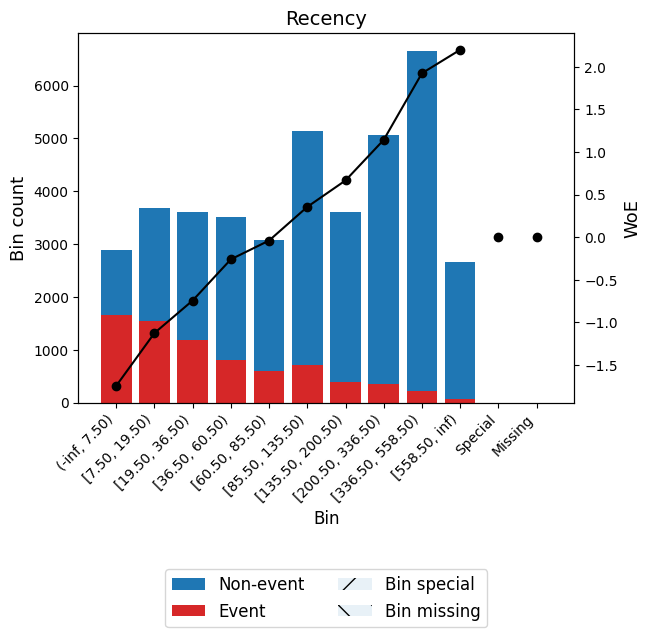

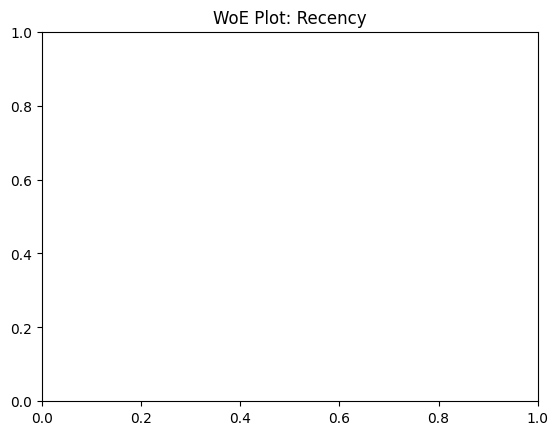


--- Анализ переменной: Frequency ---
                   Bin  Count  Event rate       WoE        IV
0         (-inf, 1.50)  12308    0.063780  1.228058  0.309086
1         [1.50, 2.50)   6193    0.108187   0.65104  0.053144
2         [2.50, 3.50)   4023    0.134725   0.40145  0.014272
3         [3.50, 4.50)   2929    0.175828  0.086515  0.000535
4         [4.50, 5.50)   2239    0.207235 -0.116688  0.000792
5         [5.50, 7.50)   3263    0.244254 -0.328861  0.009754
6        [7.50, 11.50)   3638    0.312534 -0.670061  0.049400
7       [11.50, 17.50)   2550    0.409412 -1.091961  0.100580
8         [17.50, inf)   2763    0.570756 -1.743297  0.301186
9              Special      0    0.000000       0.0  0.000000
10             Missing      0    0.000000       0.0  0.000000
Totals                  39906    0.188718            0.838749
📉 График для Frequency:


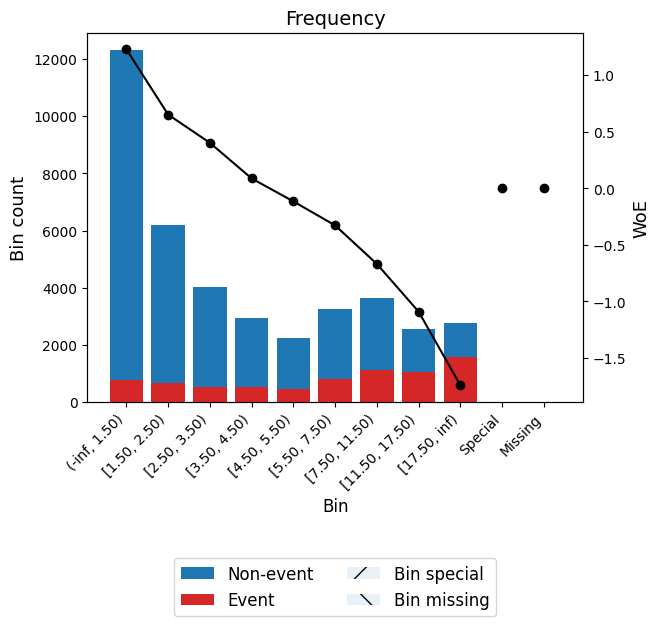

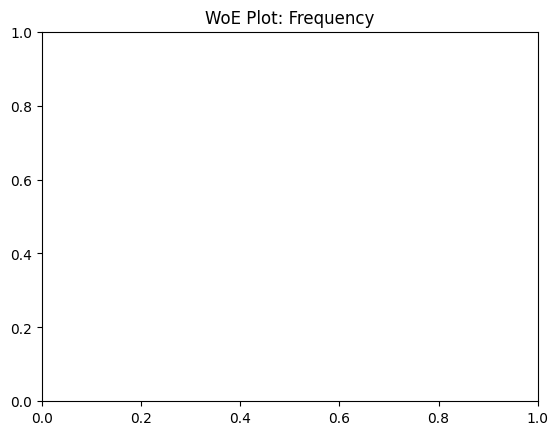


--- Анализ переменной: total_unique_items ---
                   Bin  Count  Event rate       WoE        IV
0         (-inf, 2.50)   6383    0.067053  1.174505  0.149287
1         [2.50, 3.50)   2695    0.081633  0.962009  0.045441
2         [3.50, 5.50)   4175    0.093174  0.817127  0.053349
3         [5.50, 7.50)   3242    0.117212  0.560746  0.021277
4        [7.50, 10.50)   3740    0.133957  0.408055  0.013679
5       [10.50, 16.50)   5063    0.175785   0.08681  0.000930
6       [16.50, 26.50)   5009    0.227790 -0.237526  0.007608
7       [26.50, 40.50)   3936    0.291921 -0.572285  0.038048
8       [40.50, 66.50)   3233    0.364367 -0.901901  0.083827
9         [66.50, inf)   2430    0.516461 -1.524226  0.198685
10             Special      0    0.000000       0.0  0.000000
11             Missing      0    0.000000       0.0  0.000000
Totals                  39906    0.188718            0.612131
📉 График для total_unique_items:


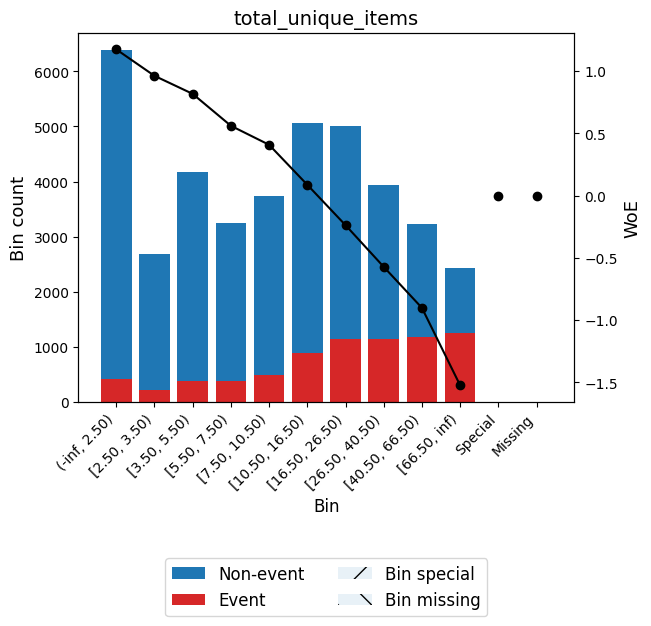

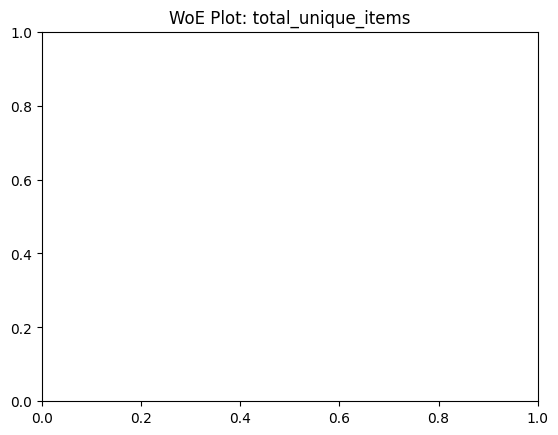


--- Анализ переменной: total_quantity ---
                    Bin  Count  Event rate       WoE        IV
0          (-inf, 2.50)   4245    0.063604  1.230999  0.107008
1          [2.50, 8.50)   7761    0.085169  0.915738  0.120451
2         [8.50, 12.50)   3423    0.111598  0.616162  0.026622
3        [12.50, 18.50)   3704    0.131479  0.429582  0.014907
4        [18.50, 24.50)   2850    0.153333  0.250334  0.004132
5        [24.50, 45.50)   6038    0.198741 -0.064179  0.000636
6        [45.50, 70.50)   3974    0.254404 -0.383096  0.016367
7        [70.50, 93.50)   2176    0.299173 -0.607119  0.023883
8       [93.50, 160.50)   3064    0.355091 -0.861625  0.071890
9         [160.50, inf)   2671    0.503182 -1.471088  0.202236
10              Special      0    0.000000       0.0  0.000000
11              Missing      0    0.000000       0.0  0.000000
Totals                   39906    0.188718            0.588133
📉 График для total_quantity:


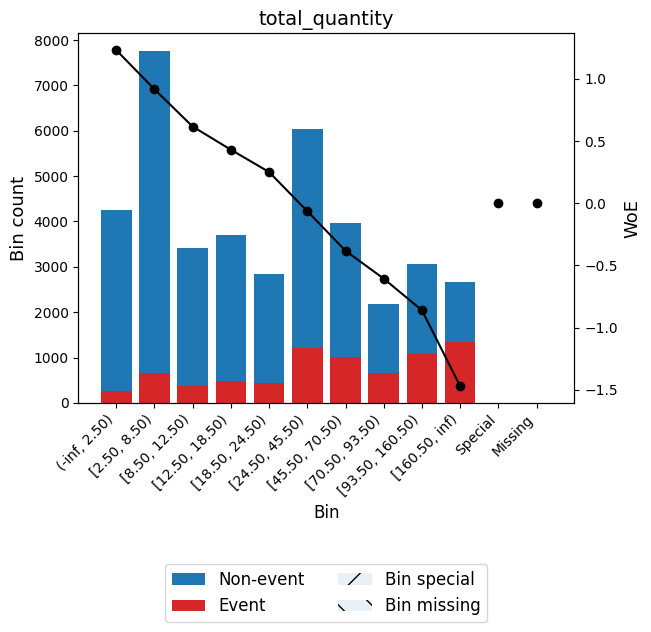

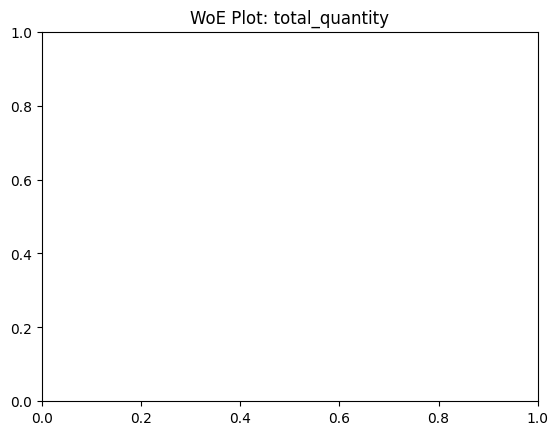


--- Анализ переменной: avg_visit_interval ---
                    Bin  Count  Event rate       WoE        IV
0         (-inf, 20.95)   7155    0.319217 -0.700988  0.107128
1        [20.95, 31.95)   3605    0.317892 -0.694882  0.052962
2        [31.95, 39.95)   2183    0.300962 -0.615637  0.024690
3        [39.95, 63.95)   4623    0.241618 -0.314529  0.012590
4        [63.95, 80.35)   2067    0.196420 -0.049537  0.000129
5       [80.35, 135.90)   3941    0.166201  0.154432  0.002243
6         [135.90, inf)   4024    0.119533  0.538503  0.024538
7               Special      0    0.000000       0.0  0.000000
8               Missing  12308    0.063780  1.228058  0.309086
Totals                   39906    0.188718            0.533365
📉 График для avg_visit_interval:


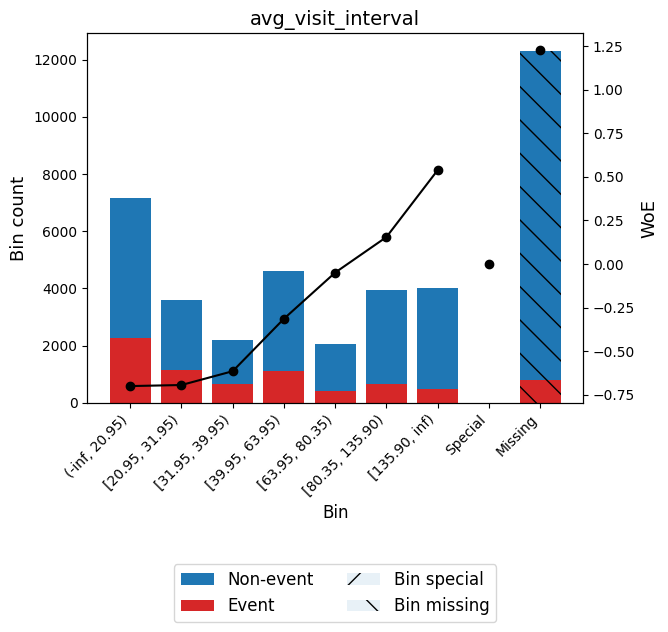

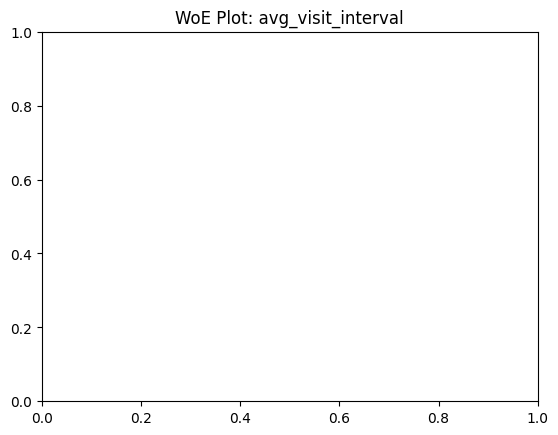


🔄 Трансформация выборок в WoE значения...

💾 Сохранение результатов...
✅ Готово! Файлы сохранены.
Размер train_woe: (39906, 12)
Размер test_woe: (41196, 12)

📦 Сериализация модели (Task 2)...
✅ Модель успешно сохранена в файл 'binning_model.pkl'

📤 Демонстрация загрузки модели...
🔄 Применение загруженной модели к тестовым данным...
✅ Трансформация новых данных с помощью загруженной модели прошла успешно!
    Recency  Frequency  Monetary  total_quantity  avg_check  \
0  2.198676   1.228058  0.639402        0.616162  -0.084852   
1 -0.260540   1.228058  0.293490        0.915738   0.203774   
2  0.665224   1.228058  0.293490        1.230999   0.484722   
3 -1.125984  -1.091961 -0.724514       -1.471088  -0.084852   
4  1.923474   1.228058  0.105049        0.915738   0.484722   

   total_unique_items  avg_items_per_visit  weekend_visits  amount_last_visit  \
0            0.817127            -0.166412        0.812011           0.171199   
1            0.962009             0.264733        

'\nОтветы на вопросы задания:\n\n1. Что делает pickle.dump()?\n   pickle.dump(obj, file) — эта функция сериализует объект Python (превращает его в поток байтов) \n   и записывает его в указанный файл. Это позволяет сохранить состояние объекта (например, обученной модели) на диск.\n\n2. Что делает pickle.load()?\n   pickle.load(file) — эта функция читает поток байтов из файла и десериализует его \n   (восстанавливает) обратно в исходный объект Python. Это используется для загрузки ранее сохраненной модели.\n\n3. Для чего нужны режимы "wb" и "rb"?\n   - "wb" (write binary): Режим записи в двоичном формате. Pickle работает с байтами, а не с текстом, \n     поэтому важно указывать \'b\' (binary), чтобы файл открылся для записи байтов.\n   - "rb" (read binary): Режим чтения в двоичном формате. Необходим для корректного чтения \n     сериализованных байтовых данных из файла.\n'

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from optbinning import OptimalBinning
import warnings

# 屏蔽一些不必要的警告
warnings.filterwarnings('ignore')

# ==========================================
# 1. ЗАГРУЗКА ДАННЫХ
# ==========================================
print("📥 Загрузка данных...")
train_df = pd.read_csv('train_sample.csv')
test_df = pd.read_csv('test_sample.csv')

# Определяем колонки
target_col = 'event'
id_col = 'client'
exclude_cols = [target_col, id_col]
variable_names = [col for col in train_df.columns if col not in exclude_cols]

# Подготовка данных (принудительное приведение типов)
X_train = train_df[variable_names].astype(float)
y_train = train_df[target_col].astype(int)
X_test = test_df[variable_names].astype(float)

print(f"✅ Данные загружены. Переменных для анализа: {len(variable_names)}")

# ==========================================
# 2. ПОСТРОЕНИЕ БИННИНГА (ЦИКЛ ПО ПЕРЕМЕННЫМ)
# ==========================================
print("\n⚙️ Запуск OptimalBinning для каждой переменной...")

binning_results = {}  # Словарь для хранения обученных объектов
iv_list = []          # Список для хранения IV

# Цикл по каждой переменной
for var in variable_names:
    try:
        # Создаем объект OptimalBinning для ОДНОЙ переменной
        # Здесь мы можем безопасно использовать monotonic_trend
        optb = OptimalBinning(
            name=var,
            dtype="numerical",
            solver="cp", # Используем стандартный solver
            monotonic_trend="auto_asc_desc", # Как в Loginom
            min_prebin_size=0.05,
            max_n_bins=10
        )
        
        # Обучаем
        optb.fit(X_train[var], y_train)
        
        # Проверяем статус
        if optb.status == "OPTIMAL":
            binning_results[var] = optb
            
            # Получаем таблицу биннинга для расчета IV
            binning_table = optb.binning_table.build()
            iv_value = binning_table['IV'].max() # IV всей переменной - это сумма IV бинов (или берем из summary)
            
            iv_list.append({'name': var, 'iv': iv_value})
        else:
            print(f"⚠️ Переменная {var}: статус {optb.status}, пропускаем.")
            
    except Exception as e:
        print(f"❌ Ошибка при обработке {var}: {e}")

# ==========================================
# 3. АНАЛИЗ IV (Information Value)
# ==========================================
print("\n📊 Анализ Information Value (IV):")

# Создаем DataFrame с IV и сортируем
iv_df = pd.DataFrame(iv_list).sort_values('iv', ascending=False).reset_index(drop=True)

# Фильтруем слабые признаки (IV < 0.02) как в задании
selected_features_df = iv_df[iv_df['iv'] >= 0.02]
print(selected_features_df)

if selected_features_df.empty:
    print("⚠️ Внимание: Нет признаков с IV >= 0.02. Используем топ-5 лучших из имеющихся.")
    top_5_vars = iv_df['name'].head(5).tolist()
else:
    top_5_vars = selected_features_df['name'].head(5).tolist()

# ==========================================
# 4 & 5. ВЫВОД ТАБЛИЦ И ГРАФИКОВ (ТОП-5)
# ==========================================
print(f"\n🏆 Топ-5 признаков для детального анализа: {top_5_vars}")

for var in top_5_vars:
    print(f"\n--- Анализ переменной: {var} ---")
    optb = binning_results[var]
    
    # 4. Таблица WoE
    # Выводим нужные колонки
    bt = optb.binning_table.build()
    print(bt[['Bin', 'Count', 'Event rate', 'WoE', 'IV']])
    
    # 5. График WoE
    print(f"📉 График для {var}:")
    optb.binning_table.plot(metric="woe", show_bin_labels=True)
    plt.title(f"WoE Plot: {var}")
    plt.show()

# ==========================================
# 6. ТРАНСФОРМАЦИЯ В WoE
# ==========================================
print("\n🔄 Трансформация выборок в WoE значения...")

# Создаем пустые DataFrame для результатов
train_woe_transformed = pd.DataFrame(index=X_train.index)
test_woe_transformed = pd.DataFrame(index=X_test.index)

# Трансформируем только отобранные (или все успешные) переменные
vars_to_transform = [v for v in variable_names if v in binning_results]

for var in vars_to_transform:
    optb = binning_results[var]
    # metric="woe" - получаем значения весов
    train_woe_transformed[var] = optb.transform(X_train[var], metric="woe")
    test_woe_transformed[var] = optb.transform(X_test[var], metric="woe")

# Добавляем ID и Target обратно
final_train_woe = pd.concat([train_df[[id_col, target_col]], train_woe_transformed], axis=1)
final_test_woe = pd.concat([test_df[[id_col, target_col]], test_woe_transformed], axis=1)

# ==========================================
# 7. СОХРАНЕНИЕ
# ==========================================
print("\n💾 Сохранение результатов...")
final_train_woe.to_csv('train_woe.csv', index=False)
final_test_woe.to_csv('test_woe.csv', index=False)

print(f"✅ Готово! Файлы сохранены.")
print(f"Размер train_woe: {final_train_woe.shape}")
print(f"Размер test_woe: {final_test_woe.shape}")

# ... (前面所有的代码保持不变，直到第7步保存CSV结束)

# ==========================================
# 8. СОХРАНЕНИЕ И ЗАГРУЗКА МОДЕЛИ (PICKLE)
# ==========================================
import pickle

print("\n📦 Сериализация модели (Task 2)...")

# Поскольку мы использовали цикл вместо BinningProcess, нам нужно сохранить:
# 1. Словарь с обученными объектами (binning_results)
# 2. Список переменных, которые мы выбрали для трансформации (vars_to_transform)
model_data = {
    'binning_results': binning_results,
    'selected_variables': vars_to_transform
}

# 1. Сохранение модели (pickle.dump)
# "wb" означает "write binary" - запись в двоичном формате
filename = "binning_model.pkl"
with open(filename, "wb") as f:
    pickle.dump(model_data, f)
    
print(f"✅ Модель успешно сохранена в файл '{filename}'")

# ---------------------------------------------------------

# 2. Загрузка модели (pickle.load) для демонстрации
# "rb" означает "read binary" - чтение в двоичном формате
print("\n📤 Демонстрация загрузки модели...")

with open(filename, "rb") as f:
    loaded_model_data = pickle.load(f)

# Извлекаем компоненты
loaded_results = loaded_model_data['binning_results']
loaded_vars = loaded_model_data['selected_variables']

# 3. Пример использования загруженной модели на новых данных (X_test)
print("🔄 Применение загруженной модели к тестовым данным...")
X_new_example = X_test.copy() # Симулируем новые данные
X_new_woe_transformed = pd.DataFrame(index=X_new_example.index)

for var in loaded_vars:
    if var in loaded_results:
        # Используем сохраненный объект OptimalBinning
        optb = loaded_results[var]
        X_new_woe_transformed[var] = optb.transform(X_new_example[var], metric="woe")

print("✅ Трансформация новых данных с помощью загруженной модели прошла успешно!")
print(X_new_woe_transformed.head())

# ==========================================
# ОТВЕТЫ НА ВОПРОСЫ (ТЕОРИЯ)
# ==========================================
"""
Ответы на вопросы задания:

1. Что делает pickle.dump()?
   pickle.dump(obj, file) — эта функция сериализует объект Python (превращает его в поток байтов) 
   и записывает его в указанный файл. Это позволяет сохранить состояние объекта (например, обученной модели) на диск.

2. Что делает pickle.load()?
   pickle.load(file) — эта функция читает поток байтов из файла и десериализует его 
   (восстанавливает) обратно в исходный объект Python. Это используется для загрузки ранее сохраненной модели.

3. Для чего нужны режимы "wb" и "rb"?
   - "wb" (write binary): Режим записи в двоичном формате. Pickle работает с байтами, а не с текстом, 
     поэтому важно указывать 'b' (binary), чтобы файл открылся для записи байтов.
   - "rb" (read binary): Режим чтения в двоичном формате. Необходим для корректного чтения 
     сериализованных байтовых данных из файла.
"""